# **Exploratory Data Analysis Esports Industry**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", message="Glyph 146 missing from current font.")
pd.options.mode.chained_assignment = None


Reading the data from csv files

In [5]:
esport = pd.read_csv('/content/GeneralEsportData.csv',encoding= 'unicode_escape')

In [68]:
countries = pd.read_csv('/content/country-and-continent-codes-list.csv')
players = pd.read_csv('/content/highest_earning_players.csv')
teams = pd.read_csv('/content/highest_earning_teams.csv')
twitch = pd.read_csv('/content/twitchdata-update.csv')
vgsale = pd.read_csv('/content/vgsales.csv')


In [6]:
esport.info

<bound method DataFrame.info of                                              Game  ...  TotalTournaments
0                                  Age of Empires  ...                96
1                               Age of Empires II  ...               989
2                              Age of Empires III  ...                77
3                           Age of Empires Online  ...                12
4                                Age of Mythology  ...                 6
..                                            ...  ...               ...
530                Gears of War: Ultimate Edition  ...                 3
531                                 Knockout City  ...                 0
532  Mobile Suit Gundam: Extreme Vs Maxi Boost ON  ...                 1
533                                 Rogue Company  ...                 2
534                                The Division 2  ...                 2

[535 rows x 7 columns]>

In [7]:
esport_counts = esport[["Game", "TotalTournaments", "ReleaseDate", "TotalEarnings","OnlineEarnings", "Genre"]].groupby("Game").agg({"TotalTournaments": np.sum, "ReleaseDate": np.mean, 
                                                                                                        "TotalEarnings": np.sum,"OnlineEarnings":np.sum, "Genre": lambda x:x.value_counts().index[0]})
esport_counts.sort_values("TotalTournaments", ascending=False, inplace=True)
esport_counts.reset_index(inplace=True)



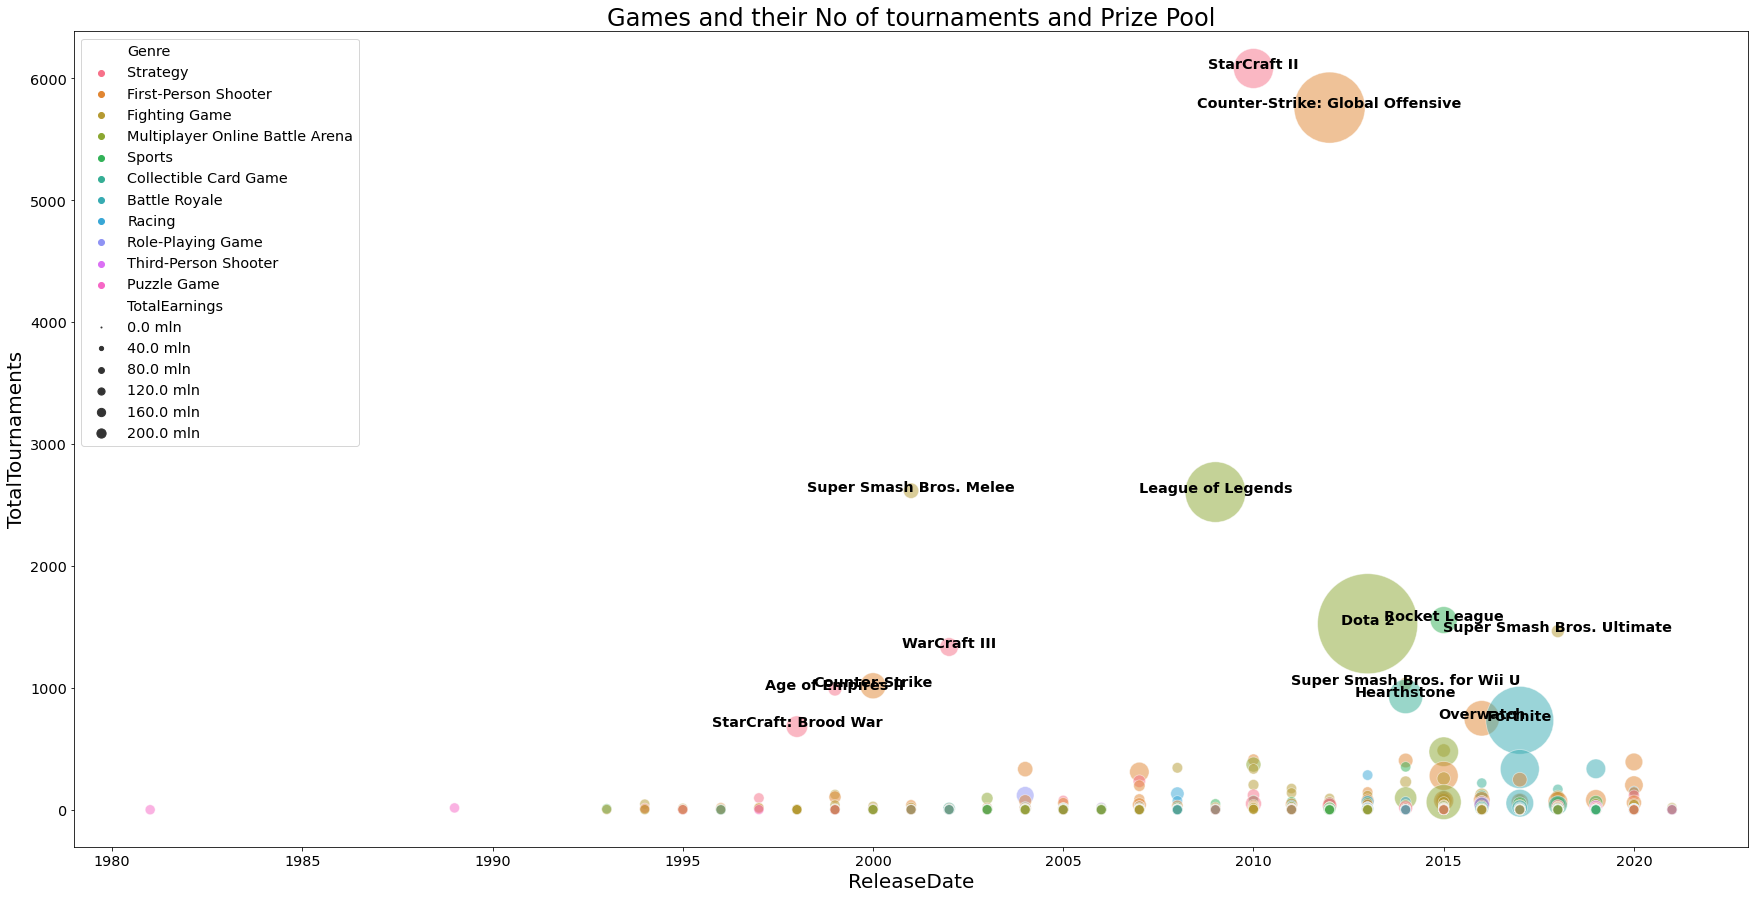

In [8]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.scatterplot(x = "ReleaseDate", y = "TotalTournaments", size = "TotalEarnings", hue="Genre", data=esport_counts, sizes=(100, 10000), alpha=.5)
most_tournamets = esport_counts.nlargest(15, "TotalTournaments")

for line in range(0,esport_counts.shape[0]):
    if esport_counts.Game[line] in list(most_tournamets.Game):
        ax.text(esport_counts.ReleaseDate[line], esport_counts.TotalTournaments[line], esport_counts.Game[line], horizontalalignment='center', 
                size='x-large', color='black', weight='semibold')

handles, labels = ax.get_legend_handles_labels()
to_skip = len(np.unique(esport_counts.Genre))+2
for h in handles[to_skip:]:
    sizes = [s / 100 for s in h.get_sizes()] 
    label = h.get_label()
    label = str(float(label)*100) +" mln"
    h.set_sizes(sizes) # set them
    h.set_label(label)
    plt.legend(loc=2, fontsize='x-large')
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
plt.rc('axes', labelsize="x-large")    
plt.title("Games and their No of tournaments and Prize Pool", fontsize=24)
plt.show()

Here we can see the number of tournaments and prize pool arranged according to year.
CSGO , StarCraft II , Dota 2 , League of legends , Fortnite are some of the significant players in this respect.

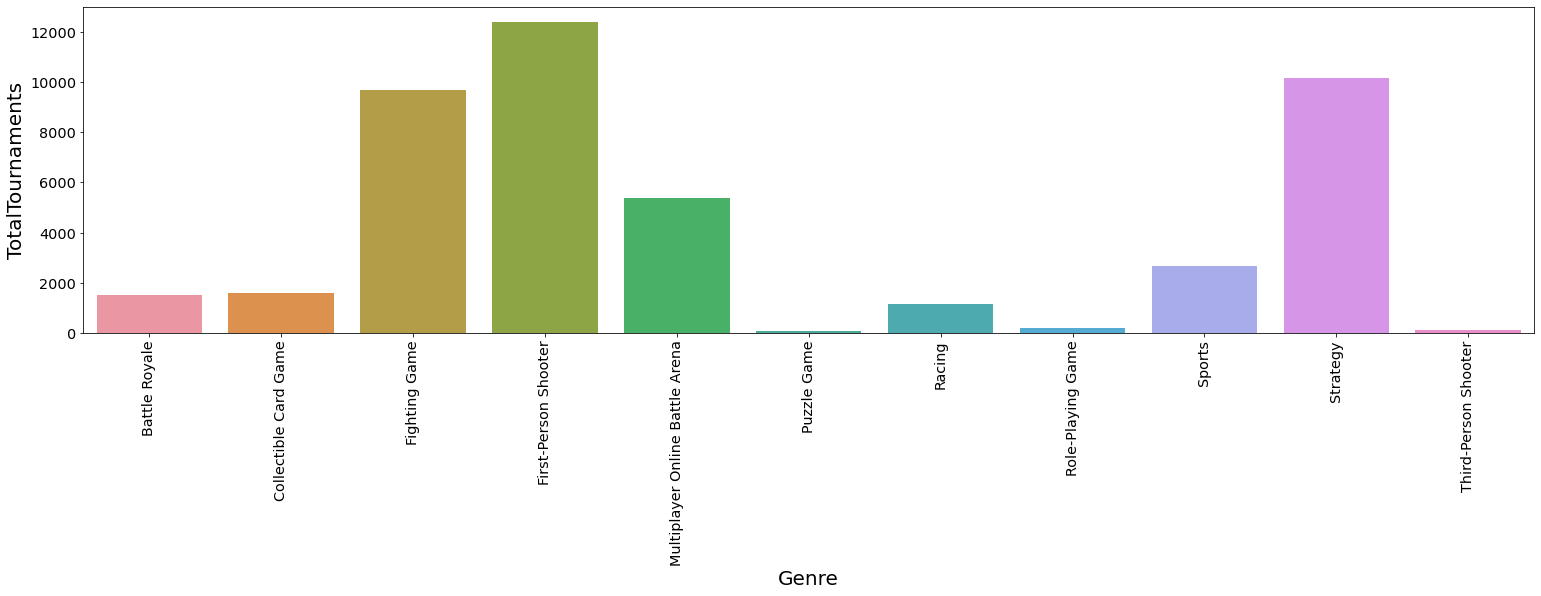

In [11]:
esporttcnt = esport.groupby("Genre").agg({"TotalTournaments": np.sum})
esporttcnt.reset_index(inplace=True)
plt.figure(figsize=(26,6))
ax = sns.barplot(x="Genre", y="TotalTournaments", data = esporttcnt)
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


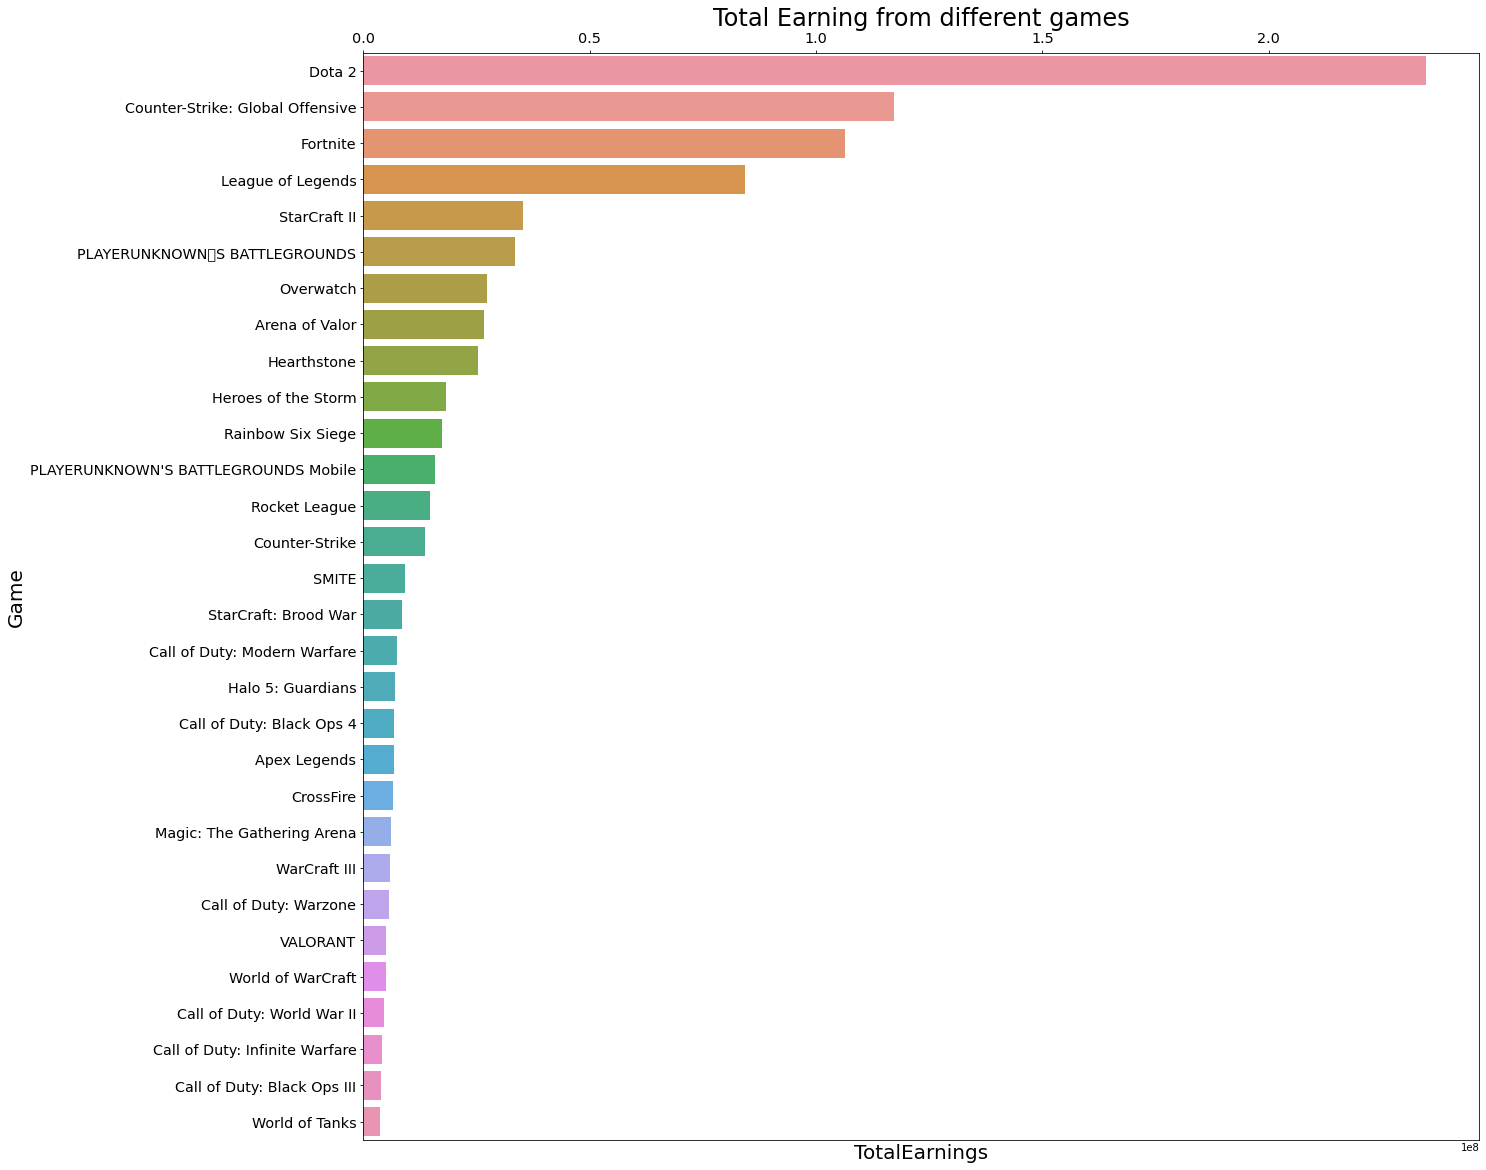

In [33]:
esport_NF = esport.copy()


esport_counts = esport_NF[["Game", "TotalTournaments", "ReleaseDate", "TotalEarnings", "Genre"]].groupby("Game").agg({"TotalTournaments": np.sum, "ReleaseDate": np.mean, 
                                                                                                        "TotalEarnings": np.sum, "Genre": lambda x:x.value_counts().index[0]})
esport_counts.sort_values("TotalEarnings", ascending=False, inplace=True)
esport_counts.reset_index(inplace=True)
esport_counts = esport_counts.nlargest(30, 'TotalEarnings')
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(esport_counts.TotalEarnings, esport_counts.Game )
ax.xaxis.tick_top()
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
plt.title("Total Earning from different games", fontsize=24)
plt.show()

In [13]:
players

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [14]:
teams

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


In [15]:
players = players.sort_values(by='TotalUSDPrize',ascending=False, ignore_index=True)
players.head(10)

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3304,Johan,Sundstein,N0tail,dk,6952596.58,Dota 2,Multiplayer Online Battle Arena
1,3822,Jesse,Vainikka,JerAx,fi,6470000.02,Dota 2,Multiplayer Online Battle Arena
2,30451,Anathan,Pham,ana,au,6000411.96,Dota 2,Multiplayer Online Battle Arena
3,2811,Sébastien,Debs,Ceb,fr,5554297.41,Dota 2,Multiplayer Online Battle Arena
4,18897,Topias,Taavitsainen,Topson,fi,5470902.57,Dota 2,Multiplayer Online Battle Arena
5,3145,Kuro,Takhasomi,KuroKy,de,5193382.81,Dota 2,Multiplayer Online Battle Arena
6,14671,Amer,Al-Barkawi,Miracle-,jo,4798043.68,Dota 2,Multiplayer Online Battle Arena
7,12579,Ivan,Ivanov,MinD_ContRoL,bg,4579118.16,Dota 2,Multiplayer Online Battle Arena
8,25335,Maroun,Merhej,GH,lb,4193412.69,Dota 2,Multiplayer Online Battle Arena
9,12133,Lasse,Urpalainen,Matumbaman,fi,3765369.04,Dota 2,Multiplayer Online Battle Arena


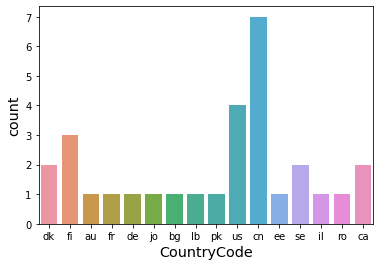

In [28]:
sns.countplot(x='CountryCode',data=players.head(30))
plt.show()

Graph shows which country has the highest number of professional esport players.

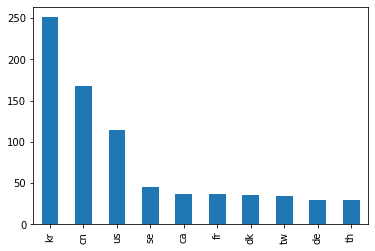

In [84]:
players_per_country = players['CountryCode'].value_counts()
top10 = players_per_country.nlargest(10)
top10
top10.plot(kind="bar")
plt.show()

In [85]:
for country in list(players['CountryCode'].unique()):
    name = countries[countries['Two_Letter_Country_Code']==country.upper()]['Country_Name'].to_string(index=False)
    print(f'{country.upper()} stands for {name} ')

DK stands for  Denmark, Kingdom of 
US stands for  United States of America 
BR stands for  Brazil, Federative Republic of 
CA stands for  Canada 
SE stands for  Sweden, Kingdom of 
FR stands for  France, French Republic 
SK stands for  Slovakia (Slovak Republic) 
NO stands for  Norway, Kingdom of 
BA stands for  Bosnia and Herzegovina 
RU stands for  Russian Federation
 Russian Federation 
UA stands for  Ukraine 
PL stands for  Poland, Republic of 
NL stands for  Netherlands, Kingdom of the 
EE stands for  Estonia, Republic of 
FI stands for  Finland, Republic of 
KZ stands for  Kazakhstan, Republic of
 Kazakhstan, Republic of 
BG stands for  Bulgaria, Republic of 
CZ stands for  Czech Republic 
TR stands for  Turkey, Republic of
 Turkey, Republic of 
BE stands for  Belgium, Kingdom of 
ES stands for  Spain, Kingdom of 
DE stands for  Germany, Federal Republic of 
GB stands for  United Kingdom of Great Britain & Northern Ire... 
CN stands for  China, People's Republic of 
UZ stands fo

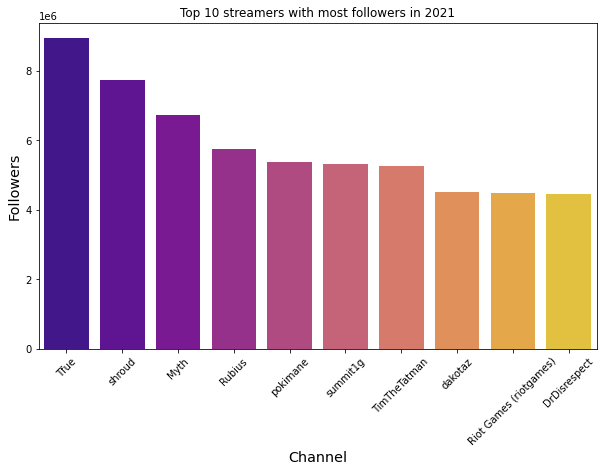

In [82]:
df = twitch[["Channel", "Followers"]]
df = df.sort_values(by="Followers", ascending=False)
fig = plt.figure(figsize=(10, 6))
followers = sns.barplot(x=df["Channel"][:10], y=df["Followers"][:10], palette="plasma")
plt.title("Top 10 streamers with most followers in 2021")
plt.xticks(rotation=45)
plt.show()

All the top streamers in Twitch a streaming platform are associated with gaming . Thus we can see that this is an alternate career option in this industry. And through the data we can also see that the earning from streaming platforms is much more than Esports Tournaments.

In [80]:
vgsale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


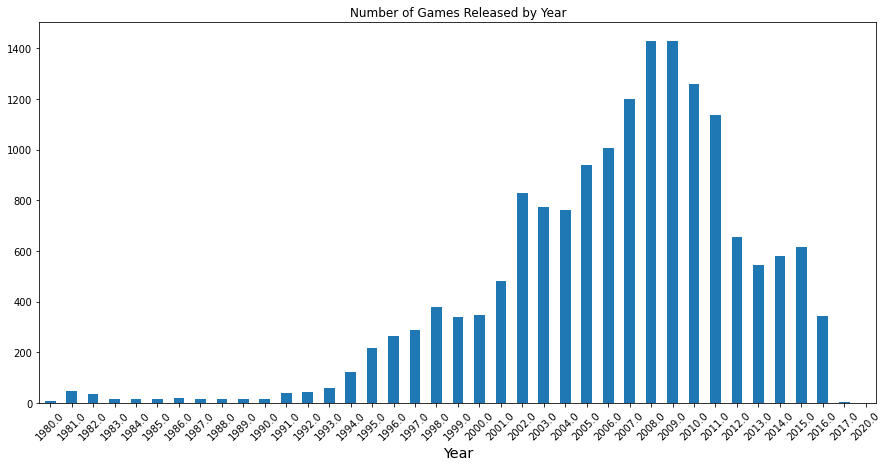

In [55]:
vgsale.groupby("Year")["Name"].count().plot(
kind="bar", y="name", figsize=(15,7))
plt.title("Number of Games Released by Year")
plt.xticks(rotation=45)
plt.show()

Sale of video games saw a steady decline .
There are many reasons for this the most important ones being.
1. Piracy
2. Free to Play model implementation became more popular.
3. Revenue from games changed from purchases to In-game purchase of skins and other cosmetic items which may or may not give competitive advantage.

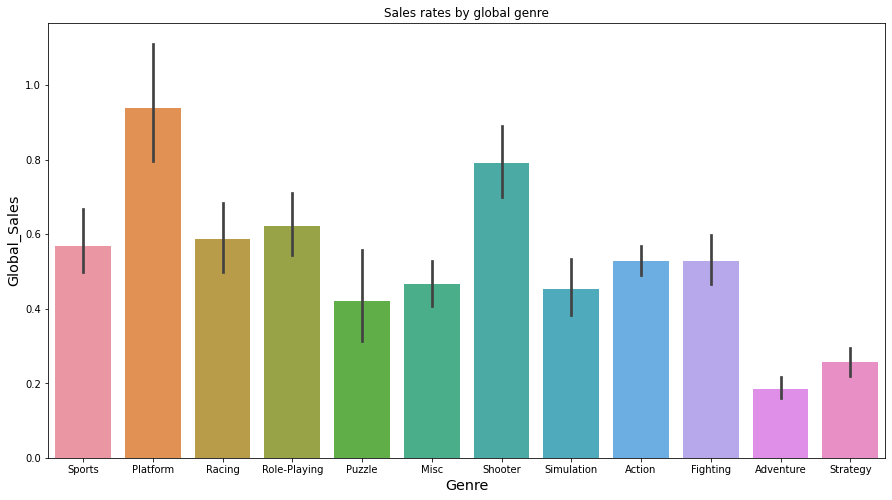

In [58]:
plt.figure(figsize=(15,8))
sns.barplot(x=vgsale.Genre, y=vgsale.Global_Sales)
plt.title("Sales rates by global genre")
plt.show()

In [73]:
sales_by_publisher = vgsale.groupby('Publisher').sum() 
sales_by_publisher.sort_values('Global_Sales', ascending = False, inplace = True) 
sales_by_publisher.head(10)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
Nintendo,2714164,1394666.0,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,7140412,2686562.0,595.07,371.27,14.04,129.77,1110.32
Activision,6368325,1938979.0,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,4105604,1367034.0,265.22,187.72,74.10,80.45,607.50
Ubisoft,6964728,1843194.0,253.43,163.32,7.50,50.26,474.72
Take-Two Interactive,2622275,827344.0,220.49,118.14,5.83,55.24,399.54
THQ,4772674,1428311.0,208.77,94.73,5.01,32.14,340.77
Konami Digital Entertainment,7331538,1650392.0,92.16,69.69,91.30,30.31,283.64
Sega,5070801,1267395.0,109.40,82.00,57.03,24.52,272.99


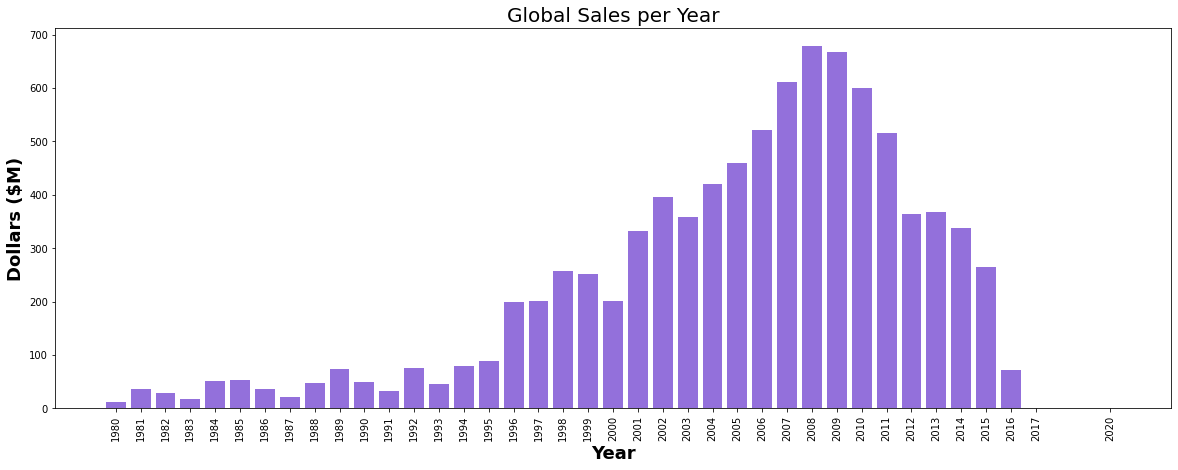

In [77]:
df_year = vgsale.groupby('Year').sum().reset_index(drop=False)

figsize = [20, 7]
x = df_year['Year']
y = df_year['Global_Sales']
width = 0.8
color = 'mediumpurple'

plt.figure(figsize=figsize)
bars = plt.bar(x, y, 
               width=width, 
               color=color)

plt.title('Global Sales per Year', fontdict={ 'fontsize':20})   
plt.xlabel('Year', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Dollars ($M)', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xticks(df_year['Year'], rotation = 90)

plt.show()